In [1]:
import utils
import params
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

Using TensorFlow backend.


In [2]:
INPUT_SHAPE = 369537
OUTPUT_SHAPE = 128
MODEL_WEIGHTS = 'TMP/model_tfidf_cnn_pca_dropout_02.h5'

original_model = Sequential()
original_model.add(Dense(input_dim=INPUT_SHAPE, units = 150, kernel_initializer='normal'))
original_model.add(Activation('relu'))
original_model.add(Dropout(0.2))
original_model.add(Dense(units = 130, kernel_initializer='normal'))
original_model.add(Activation('relu'))
original_model.add(Dropout(0.2))
original_model.add(Dense(units = OUTPUT_SHAPE, kernel_initializer='normal'))
original_model.compile(loss='mean_squared_error',optimizer='adam')

original_model.load_weights(MODEL_WEIGHTS)

INPUT_SHAPE = 91155
OUTPUT_SHAPE = 128
MODEL_WEIGHTS = 'TMP/model_reduced_tfidf_cnn_pca_dropout_02.h5'

reduced_model = Sequential()
reduced_model.add(Dense(input_dim=INPUT_SHAPE, units = 150, kernel_initializer='normal'))
reduced_model.add(Activation('relu'))
reduced_model.add(Dropout(0.2))
reduced_model.add(Dense(units = 130, kernel_initializer='normal'))
reduced_model.add(Activation('relu'))
reduced_model.add(Dropout(0.2))
reduced_model.add(Dense(units = OUTPUT_SHAPE, kernel_initializer='normal'))
reduced_model.compile(loss='mean_squared_error',optimizer='adam')

reduced_model.load_weights(MODEL_WEIGHTS)

INPUT_SHAPE = 300
OUTPUT_SHAPE = 128
MODEL_WEIGHTS = 'TMP/model_w2v_cnn_pca_dropout_02.h5'

w2v_model = Sequential()
w2v_model.add(Dense(input_dim=INPUT_SHAPE, units = 150, kernel_initializer='normal'))
w2v_model.add(Activation('relu'))
w2v_model.add(Dropout(0.2))
w2v_model.add(Dense(units = 130, kernel_initializer='normal'))
w2v_model.add(Activation('relu'))
w2v_model.add(Dropout(0.2))
w2v_model.add(Dense(units = OUTPUT_SHAPE, kernel_initializer='normal'))
w2v_model.compile(loss='mean_squared_error',optimizer='adam')

w2v_model.load_weights(MODEL_WEIGHTS)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
tree = utils.importPickle(params.CNN_VAL_INDEX)
order = utils.importPickle(params.CNN_VAL_ORDER)

bigram_model = utils.importPickle(params.BIGRAM_MODEL)
tf_idf = utils.importPickle(params.TF_IDF_MODEL)

reduced_bigram_model = utils.importPickle(params.REDUCED_BIGRAM_MODEL)
reduced_tf_idf = utils.importPickle(params.REDUCED_TF_IDF_MODEL)

c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\bldr1\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.18.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
captions = utils.readCaptions(params.VAL_CAPTIONS_PATH)

In [5]:
k = 3

In [6]:
caption_idx = 600
caption = captions[caption_idx]['caption']
caption_id = captions[caption_idx]['image_id']
caption_des = np.load(  params.W2V_DESCRIPTORS_VAL_PATH+str(caption_id)+'.npy'  )
predictions = [w2v_model.predict(x.reshape(-1,INPUT_SHAPE)) for x in caption_des]

In [7]:
print(caption, caption_id)

Two computers sitting on top of a desk. 63740


### Word2Vect

In [9]:
dist, idxs = tree.query(predictions[4]/np.linalg.norm(predictions[4]), k = k)

In [10]:
selected_images = [order[i] for i in idxs[0]]

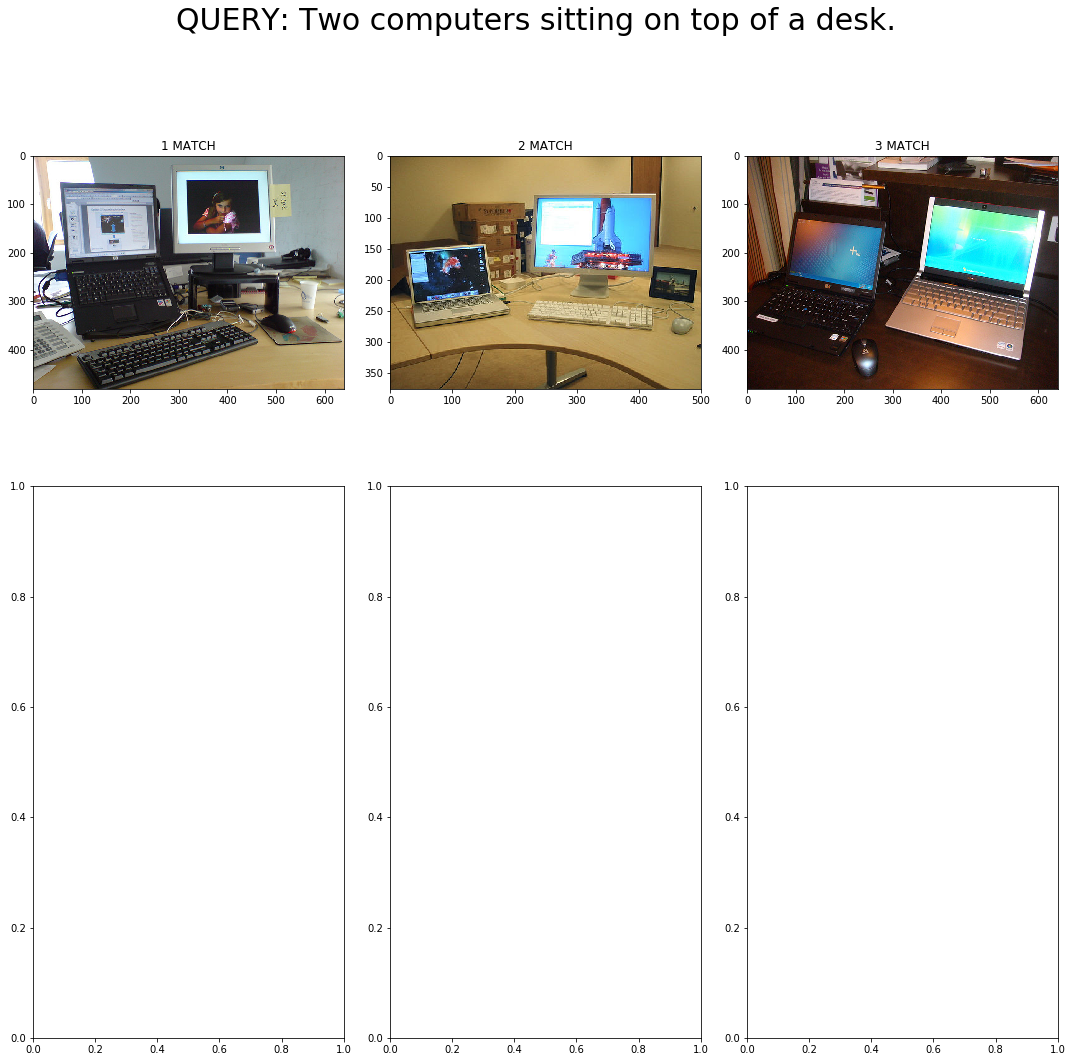

In [11]:
f, ax = plt.subplots(int(k/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(caption), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images):
    path = params.VAL_IMAGES_PATH + os.path.basename(image).split('.')[0][4:]+'.jpg'
    img = plt.imread(path)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()

### ORIGINAL MODEL

In [ ]:
caption = 'football'

In [ ]:
query_token = caption.split(' ')
stemmer = SnowballStemmer("english")

In [ ]:
query_ = ' '.join([stemmer.stem(word) for word in query_token])
print(caption)
print(query_)

In [ ]:
sparse = bigram_model.transform([query_])
descriptor = tf_idf.transform(sparse)
descriptor2img = original_model.predict(descriptor)
dist, idxs = tree.query(descriptor2img/np.linalg.norm(descriptor2img), k = k)

In [ ]:
selected_images = [order[i] for i in idxs[0]]

In [ ]:
f, ax = plt.subplots(int(k/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(caption), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images):
    path = params.VAL_IMAGES_PATH + os.path.basename(image).split('.')[0][4:]+'.jpg'
    img = plt.imread(path)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()

### REDUCED MODEL

In [ ]:
caption = 'basketball'

In [ ]:
query_token = caption.split(' ')
stemmer = SnowballStemmer("english")

In [ ]:
query_ = ' '.join([stemmer.stem(word) for word in query_token])
print(caption)
print(query_)

In [ ]:
sparse = reduced_bigram_model.transform([query_])
descriptor = reduced_tf_idf.transform(sparse)
descriptor2img = reduced_model.predict(descriptor)
dist, idxs = tree.query(descriptor2img/np.linalg.norm(descriptor2img), k = k)

In [ ]:
selected_images = [order[i] for i in idxs[0]]

In [ ]:
f, ax = plt.subplots(int(k/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(caption), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images):
    path = params.VAL_IMAGES_PATH + os.path.basename(image).split('.')[0][4:]+'.jpg'
    img = plt.imread(path)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()